In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm 


# Example usage
# Assuming you have loaded MNIST data into X_train (images) and y_train (labels)
# You need to preprocess the data (e.g., flatten images and one-hot encode labels) before using it

# train(X_train, y_train, epochs=10, batch_size=64)


In [2]:
train_data_pd = pd.read_csv('./train.csv')
test_data_pd = pd.read_csv('./test.csv')

In [3]:
train_data = np.array(train_data_pd)
test_data = np.array(test_data_pd)

In [4]:
train_label = train_data[:, :1]

train_data = train_data[:, 1:]


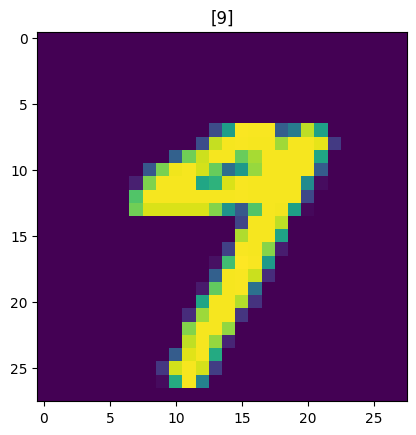

In [5]:
index = 95
plt.title((train_label[index]))
plt.imshow(train_data[index].reshape(28,28))

In [6]:
train_data = train_data/np.max(train_data)
test_data = test_data/np.max(test_data)

In [7]:
print(np.max(train_data))
print(np.max(test_data))

1.0
1.0


In [8]:
train_lables_OH = np.zeros((train_data.shape[0], 10))
train_lables_OH

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
for i, lable in enumerate(train_label):
    # print(i, lable)
    train_lables_OH[i][lable] = 1


In [10]:
print(train_data.shape)
print(train_lables_OH.shape)

(42000, 784)
(42000, 10)


In [11]:
# Define the ReLU activation function
def relu(x):
    return np.maximum(0, x)

# Define the derivative of the ReLU activation function
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Define the softmax function
def softmax(x):
    exp_vals = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_vals / np.sum(exp_vals, axis=-1, keepdims=True)

# Define the categorical cross-entropy loss function
def categorical_cross_entropy(y_pred, y_true):
    num_samples = y_pred.shape[0]
    return -np.sum(y_true * np.log(y_pred + 1e-15)) / num_samples


In [12]:
# Initialize weights and biases
input_size = 784  # MNIST image size (28x28)
hidden_size = 128
output_size = 10
learning_rate = 0.001

W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

In [13]:
# Forward pass
def forward_pass(X):
    global W1, b1, W2, b2
    # Input layer to hidden layer
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)
    # Hidden layer to output layer
    z2 = np.dot(a1, W2) + b2
    a2 = softmax(z2)
    return a1, a2

# Backward pass
def backward_pass(X, y_true, a1, a2):
    global W1, b1, W2, b2
    num_samples = X.shape[0]
    # Compute gradients for output layer
    dz2 = (a2 - y_true) / num_samples
    dW2 = np.dot(a1.T, dz2)
    db2 = np.sum(dz2, axis=0)
    # Compute gradients for hidden layer
    da1 = np.dot(dz2, W2.T)
    dz1 = da1 * relu_derivative(a1)
    dW1 = np.dot(X.T, dz1)
    db1 = np.sum(dz1, axis=0)
    # Update weights and biases
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2


In [14]:
# Training loop
def train(X_train, y_train, epochs, batch_size):
    num_samples = X_train.shape[0]
    for epoch in range(epochs):
        for i in range(0, num_samples, batch_size):
            X_batch = X_train[i:i+batch_size]
            y_batch = y_train[i:i+batch_size]
            # Forward pass
            a1, a2 = forward_pass(X_batch)
            # Backward pass
            backward_pass(X_batch, y_batch, a1, a2)
        # Compute training loss
        _, y_pred = forward_pass(X_train)
        loss = categorical_cross_entropy(y_pred, y_train)
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}')


In [47]:
train(train_data, train_lables_OH, epochs=300, batch_size=64)

Epoch 1/300, Loss: 0.7614
Epoch 2/300, Loss: 0.7583
Epoch 3/300, Loss: 0.7552
Epoch 4/300, Loss: 0.7521
Epoch 5/300, Loss: 0.7490
Epoch 6/300, Loss: 0.7459
Epoch 7/300, Loss: 0.7429
Epoch 8/300, Loss: 0.7399
Epoch 9/300, Loss: 0.7369
Epoch 10/300, Loss: 0.7339
Epoch 11/300, Loss: 0.7309
Epoch 12/300, Loss: 0.7280
Epoch 13/300, Loss: 0.7251
Epoch 14/300, Loss: 0.7222
Epoch 15/300, Loss: 0.7193
Epoch 16/300, Loss: 0.7164
Epoch 17/300, Loss: 0.7136
Epoch 18/300, Loss: 0.7107
Epoch 19/300, Loss: 0.7079
Epoch 20/300, Loss: 0.7051
Epoch 21/300, Loss: 0.7023
Epoch 22/300, Loss: 0.6996
Epoch 23/300, Loss: 0.6969
Epoch 24/300, Loss: 0.6942
Epoch 25/300, Loss: 0.6915
Epoch 26/300, Loss: 0.6888
Epoch 27/300, Loss: 0.6861
Epoch 28/300, Loss: 0.6835
Epoch 29/300, Loss: 0.6809
Epoch 30/300, Loss: 0.6783
Epoch 31/300, Loss: 0.6757
Epoch 32/300, Loss: 0.6732
Epoch 33/300, Loss: 0.6706
Epoch 34/300, Loss: 0.6681
Epoch 35/300, Loss: 0.6656
Epoch 36/300, Loss: 0.6631
Epoch 37/300, Loss: 0.6606
Epoch 38/3

Predicted value 7


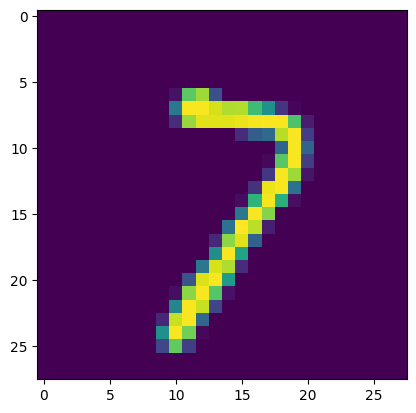

In [48]:
def predict(index):
    test_ele = test_data[index: index+1, :]
    plt.imshow(test_ele.reshape(28,28))
    _, y_pred = forward_pass(test_ele)
    print('Predicted value', np.argmax(y_pred))

predict(40)

In [49]:
weights = {
    'W1': W1, 
    'b1': b1,
    'W2': W2,
    'b2': b2}

In [50]:
import pickle

with open('weights.pkl', 'wb') as file:
    pickle.dump(weights, file)

In [51]:
import pickle
with open('weights.pkl', 'rb') as file:
    loaded_weights = pickle.load(file)
loaded_weights.keys()

dict_keys(['W1', 'b1', 'W2', 'b2'])

In [52]:
def load_weights():
    global W1, b1, W2, b2
    with open('weights.pkl', 'rb') as file:
        lw = pickle.load(file)
    print(lw.keys())
    W1, b1, W2, b2 = lw['W1'], lw['b1'], lw['W2'], lw['b2']     

load_weights()

dict_keys(['W1', 'b1', 'W2', 'b2'])


Predicted value 7


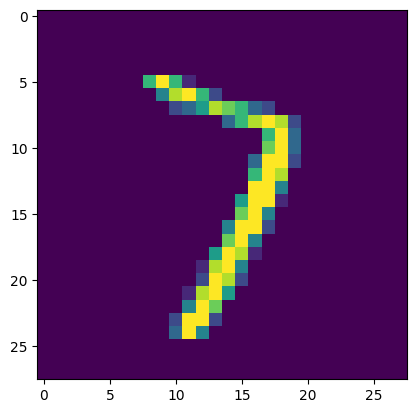

In [83]:
import random
predict(random.randint(1, 1000))